# Homework 2
### Author: Mateusz Sieniawski

#### Import dataset (Boston Housing)

In [26]:
import shap
import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error as msle

X, y = shap.datasets.boston()

#### Understand the data

Interesing fact: There are a lot of houses priced at $50k - it might suggest that data was censored and houses with higher prices were shrinked. Authors of the dataset don't mention it.

Theres is no missing values in the dataset.

#### Dataset features:

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.

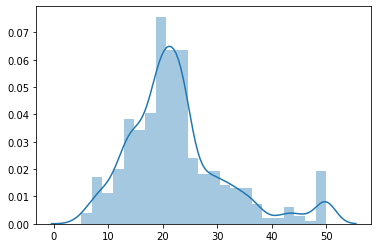

In [2]:
# House prices distribution
sns.distplot(y)

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

To output multiple subplots, the figure containing the passed axes is being cleared


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f024a5b20b8>,
      dtype=object)

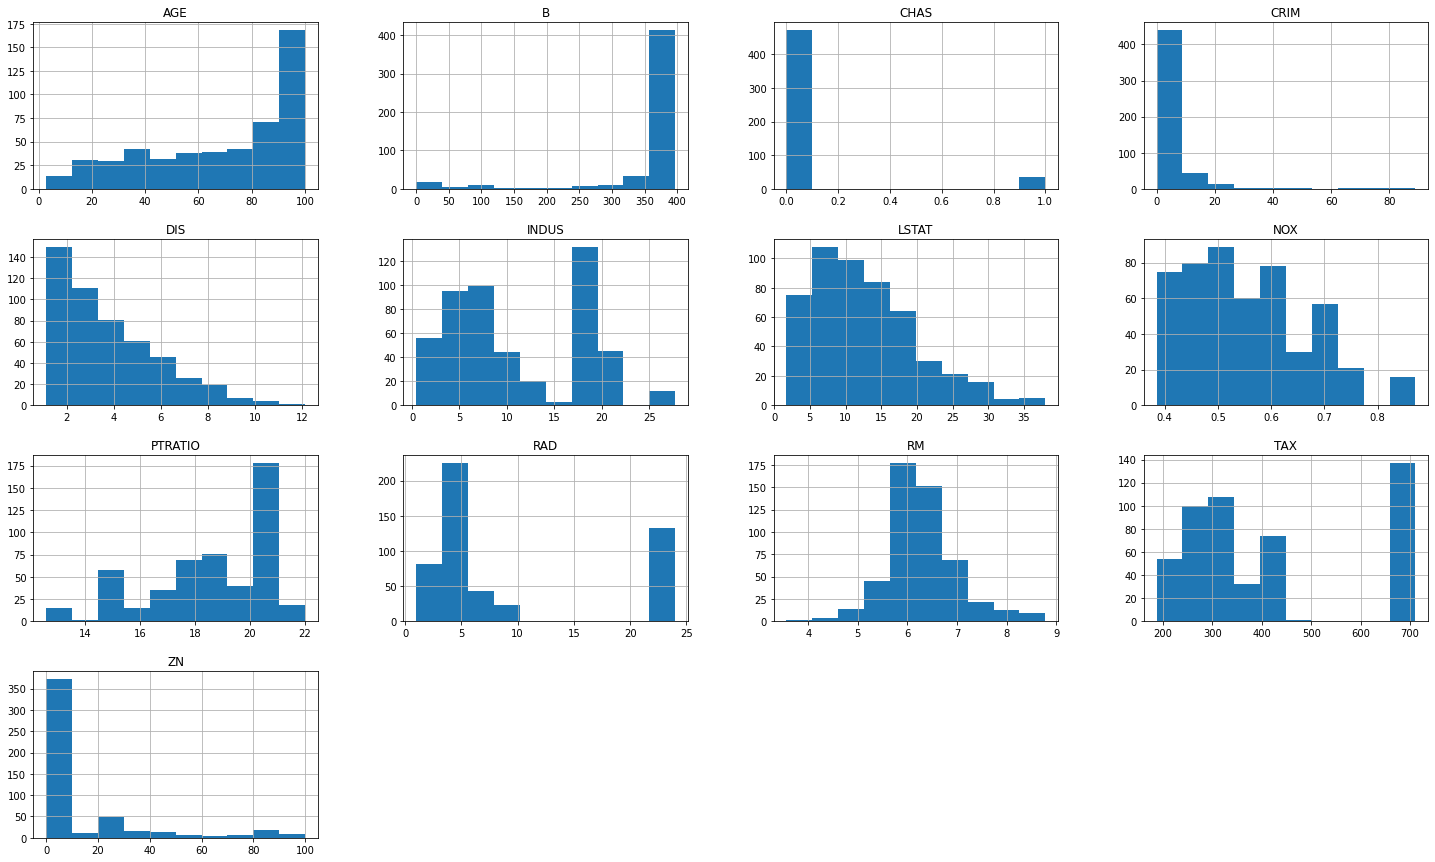

In [6]:
# Plot the data
fig = plt.figure(figsize = (25,15))
ax = fig.gca()
X.hist(ax = ax)

### (1) For the selected data set, train at least one tree-based ensemble model (random forest, gbm, catboost or any other boosting)
Train a xgboost model

In [24]:
# split data into train and test sets
seed = 42
test_size = 0.2
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, random_state=seed)

model = xgb.XGBRegressor(eval_metric="rmse")
model.fit(X_train, y_train)
print(model)

y_pred = model.predict(X_test)
loss = msle(y_test, y_pred)
print(f"Loss: {loss:.3f}")

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Loss: 0.013


### (2) for some selected observations (two or three) from this dataset, calculate predictions for model (1)

In [38]:
X3 = X_train.sample(3)
X3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
391,5.29305,0.0,18.10,0.0,0.700,6.051,82.5,2.1678,24.0,666.0,20.2,378.38,18.76
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
81,0.04462,25.0,4.86,0.0,0.426,6.619,70.4,5.4007,4.0,281.0,19.0,395.63,7.22


Calculate model predictions for sample 3 observations

In [39]:
model.predict(X3)

array([23.161224 ,  7.2053533, 23.928858 ], dtype=float32)

#### Calculate global variable importance

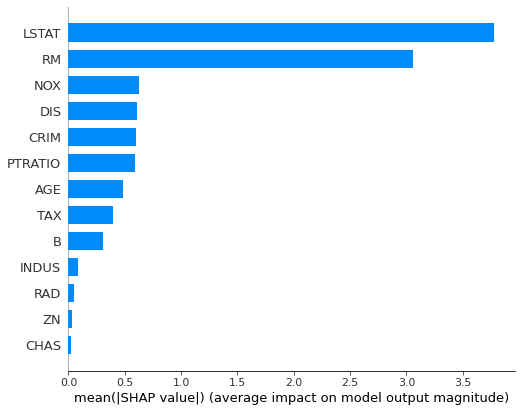

In [42]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

### (3) for observations selected in (2), calculate the decomposition of model prediction using SHAP, Break Down or both (packages for R: DALEX, iml, packages for python: shap, dalex).

In [141]:
def shap_plot(model, data, j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(data)
    return shap.force_plot(explainerModel.expected_value, shap_values_Model[j], data.iloc[[j]])

SHAP values of sample 3 observations

In [243]:
shap_plot(model, X3, 0)

In [244]:
shap_plot(model, X3, 1)

In [245]:
shap_plot(model, X3, 2)

### (4) find two observations in the data set, such that they have different most important variables (e.g. age and gender are the most important for observation A, but race and class for observation B)

For observaton no. 42 the most important variables are LSTAT and NOX, but for observation no. 14 the most importantvariables are RM and TAX. These houses are very different - the first's house price is very low, whilst the second's very high. 

SHAP values of observation no. 42

In [84]:
shap_plot(model, X_train, 42)

SHAP values of observation no. 14

In [85]:
shap_plot(model, X_train, 14)

### (5) (if possible) select one variable and find two observations in the data set such that for one observation this variable has a positive effect and for the other a negative effect

In observation no. 0 the LSTAT variable has negative effect on the prediciton, whilst in observation no. 1 the LSTAT variable has positive effect.

SHAP values of observation no. 0

In [240]:
shap_plot(model, X_train, 0)

SHAP values of observation no. 1

In [242]:
shap_plot(model, X_train, 1)

### (6) train a second model (of any class, neural nets, linear, other boosting) and find an observation for which BD/shap attributions are different between the models
Train decision tree

In [229]:
from sklearn.tree import DecisionTreeRegressor

model_2 = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
y_pred = model_2.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"Loss: {rms}")

Loss: 5.098351782289174


#### Samples where SHAP values differ between models

For observation no. 131 SHAP attributions are different for XGBoost model and Decision Tree model. The most important variables for XGBoost model are TAX and CRIM, whilst for Decision Tree LSTAT and RM.

XGBoost SHAP values

In [ ]:
shap.initjs()

In [230]:
shap_plot(model, X_train, 131)

Decision tree SHAP values

In [228]:
shap_plot(model_2, X_train, 131)

# (7) Comments

#### (4) find two observations in the data set, such that they have different most important variables (e.g. age and gender are the most important for observation A, but race and class for observation B)
For observaton no. 42 the most important variables are LSTAT and NOX, but for observation no. 14 the most importantvariables are RM and TAX. These houses are very different - the first's house price is very low, whilst the second's very high. 

#### (5) (if possible) select one variable and find two observations in the data set such that for one observation this variable has a positive effect and for the other a negative effect
In observation no. 0 the LSTAT variable has negative effect on the prediciton, whilst in observation no. 1 the LSTAT variable has positive effect.

#### (6) train a second model (of any class, neural nets, linear, other boosting) and find an observation for which BD/shap attributions are different between the models
For the second model I have trained a Decision Tree. For observation no. 131 SHAP attributions are different for XGBoost model and Decision Tree model. The most important variables for XGBoost model are TAX and CRIM, whilst for Decision Tree LSTAT and RM.